# <center><span style="color:red;"> <b> Data Science Job Salaries </b></span></center>

<p align="center">
    <strong> </strong> <a href="https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries"> Kaggle - Dataset Link</a>
</p>

## <center><span style="text-decoration: underline;">Exploratory Data Analysis (EDA)</span></center>

<h4 style="margin-bottom: 0;">📝 Dataset Description: Data Science Job Salaries </h4>

- **`work_year`**: The year the salary was paid.

- **`experience_level`**: The experience level in the job during the year:
  - **EN**: Entry-level / Junior
  - **MI**: Mid-level / Intermediate
  - **SE**: Senior-level / Expert
  - **EX**: Executive-level / Director

- **`employment_type`**: The type of employment for the role:
  - **PT**: Part-time
  - **FT**: Full-time
  - **CT**: Contract
  - **FL**: Freelance

- **`job_title`**: The role worked in during the year.

- **`salary`**: The total gross salary amount paid.

- **`salary_currency`**: The currency of the salary paid, represented as an ISO 4217 currency code.

- **`salary_in_usd`**: The salary converted to USD using the average exchange rate for the respective year (via [fxdata.foorilla.com](https://fxdata.foorilla.com)).

- **`employee_residence`**: The primary country of residence of the employee during the work year (ISO 3166 country code).

- **`remote_ratio`**: The overall amount of work done remotely:
  - **0**: No remote work (less than 20%)
  - **50**: Partially remote
  - **100**: Fully remote (more than 80%)

- **`company_location`**: The country of the employer's main office or contracting branch (ISO 3166 country code).

- **`company_size`**: The average number of employees at the company during the year:
  - **S**: Less than 50 employees (*small*)
  - **M**: 50 to 250 employees (*medium*)
  - **L**: More than 250 employees (*large*)

## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> Table of Content </b></div>

* [Import Libraries](#chapter1)
* [Initialize Functions](#chapter2)
* [Descriptive Statistics](#chapter3)
* [Feature Engineering](#chapter4)
* [One Way Anova](#chapter5)
* [Two Way Anova](#chapter6)
* [Conclusions](#chapter7)
* [Another Cell](#another_cell)
* [Another Cell 2](#Prepare-Functions-for-Statistical-Analysis)
* [4.2 Backslash Escape](#z)

<a id="chapter1"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> ⚙️ Download Libraries </b></div>

In [104]:
import pandas as pd
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', 1000)       # Adjust width to fit content
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
from IPython.display import display
import category_encoders as ce
from nltk.stem import SnowballStemmer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Choose the template for your figures
sns.set_theme("notebook") 
sns.set_palette("Set3") 

<a id="chapter2"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🔬 Prepare Functions for Statistical Analysis </b></div>

In [2]:
# Set significance level
alpha = 0.05

# Function to print whether the data is normaly distributed
def normality_test(pvalue):
    if pvalue <= alpha:
        return f'The p-value ({pvalue:.2f}) is less than the specified significance level {alpha:.2f}. We reject H0 - the data is not normally distributed.'
    else:
        return f'The p-value ({pvalue:.2f}) is greater than the specified significance level {alpha:.2f}. We fail to reject H0 - the data is normally distributed.'
        
# Function to print the output of tested hypothesis
def hypothesis_test(pvalue):
    if pvalue <= alpha:
        return f'The p-value ({pvalue:.2f}) is less than the specified significance level {alpha:.2f}. We reject H0.'
    else:
        return f'The p-value ({pvalue:.2f}) is greater than the specified significance level {alpha:.2f}. We fail to reject H0.'

<a id="chapter3"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> ✨ Some preliminary descriptive analysis  </b></div>

In [3]:
# Upload Dataset
raw_data = pd.read_csv('data/salary.zip')
print('Beginning of the dataset:')
display(raw_data.head(2))
print('End of the dataset:')
display(raw_data.head(2))
print("Number of variables:", raw_data.shape[1])
print('Number of observations:', raw_data.shape[0])

Beginning of the dataset:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


End of the dataset:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


Number of variables: 12
Number of observations: 607


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


 - Data types are as expected.

In [5]:
# Check for missing values
print(raw_data.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


- There are **no** missing values

In [6]:
print(f'Number of duplicates: {raw_data[raw_data.duplicated()].shape[0]}')

Number of duplicates: 0


In [7]:
print('Top 10 Countries with Data Science Jobs info:')
data_iso = raw_data['company_location'].value_counts(normalize=True).sort_values(ascending=False).round(2)[:10].to_frame()
data_iso = data_iso.rename_axis('Country', axis='index')
data_iso.columns = ['Percentage']
display(data_iso)

print('Total number of unique countries in the dataset:', raw_data['company_location'].nunique())

Top 10 Countries with Data Science Jobs info:


,Percentage
Country,
US,0.58
GB,0.08
CA,0.05
DE,0.05
IN,0.04
FR,0.02
ES,0.02
GR,0.02
JP,0.01


Total number of unique countries in the dataset: 50


In [8]:
print('Top 10 Data Science job titles:')
data_ds = raw_data['job_title'].value_counts(normalize=True).sort_values(ascending=False).round(2)[:10].to_frame()
data_ds = data_ds.rename_axis('Title', axis='index')
data_ds.columns = ['Percentage']
display(data_ds)

print('Total number of unique job titles:', raw_data['job_title'].nunique())

Top 10 Data Science job titles:


,Percentage
Title,
Data Scientist,0.24
Data Engineer,0.22
Data Analyst,0.16
Machine Learning Engineer,0.07
Research Scientist,0.03
Data Science Manager,0.02
Data Architect,0.02
Big Data Engineer,0.01
Machine Learning Scientist,0.01


Total number of unique job titles: 50


In [9]:
# Drop not important variables 
raw_data = raw_data.drop(['Unnamed: 0'], axis = 1) 
raw_data.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


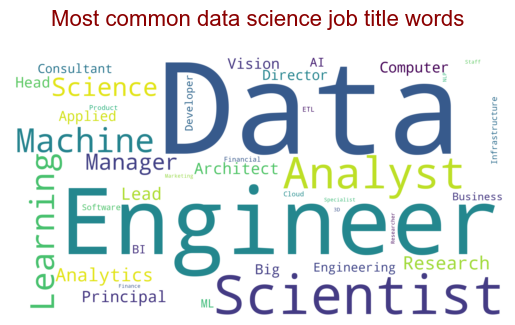

In [10]:
ds_title = " ".join(title for title in raw_data.job_title)
word_cloud_ds = WordCloud(collocations = False, 
                          background_color = 'white',
                          colormap='viridis',
                          width = 2048, 
                          height = 1080,
                          contour_color='black').generate(ds_title)
# saving the image
word_cloud_ds.to_file('images/word_cloud.png')

plt.imshow(word_cloud_ds, interpolation='bilinear')
plt.axis("off")
plt.title(
    "Most common data science job title words",  
    fontsize=16,                         
    color='darkred',                         
    pad=20     # Padding between title and the plot
)
plt.show()

<a id="chapter4"></a>  
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🧐 Feature Engineering </b></div>

In [11]:
# Encode 'company_size' variable
ord_encode = ce.OrdinalEncoder(mapping= [{
    'col' : 'company_size',
    'mapping' : {'S': 1, 'M':2, 'L':3}
}])
data_bin = ord_encode.fit_transform(raw_data['company_size'])
raw_data['company_size_enc'] = data_bin['company_size']

# Encode 'experience_level' variable
ord_encode = ce.OrdinalEncoder(mapping=[{
    'col': 'experience_level',
    'mapping': {'EN':1, 'MI':2, 'SE':3, 'EX':4}
}])
data_bin = ord_encode.fit_transform(raw_data['experience_level'])
raw_data['exper_level_enc'] = data_bin['experience_level']

# Generate dummies for employment type (there is no clear ordering of this variable)
encoder = ce.OneHotEncoder('employment_type', use_cat_names=True)
type_bin = encoder.fit_transform(raw_data['employment_type'])
raw_data = pd.concat([raw_data, type_bin], axis=1)

In [12]:
# Convert country codes to continents
def country_to_continent(country_code):
    continent_code = {
    'Africa': [
        'DZ', 'AO', 'BJ', 'BW', 'BF', 'BI', 'CM', 'CV', 'CF', 'TD', 'KM', 'CG', 'CD',
        'DJ', 'EG', 'GQ', 'ER', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'CI', 'KE', 'LS',
        'LR', 'LY', 'MG', 'MW', 'ML', 'MR', 'MU', 'MA', 'MZ', 'NA', 'NE', 'NG', 'RW',
        'ST', 'SN', 'SC', 'SL', 'SO', 'ZA', 'SS', 'SD', 'SZ', 'TZ', 'TG', 'TN', 'UG',
        'EH', 'ZM', 'ZW'
    ],
    'Asia': [
        'AF', 'AM', 'AZ', 'BH', 'BD', 'BT', 'BN', 'KH', 'CN', 'CY', 'GE', 'IN', 'ID',
        'IR', 'IQ', 'IL', 'JP', 'JO', 'KZ', 'KW', 'KG', 'LA', 'LB', 'MY', 'MV', 'MN',
        'MM', 'NP', 'KP', 'OM', 'PK', 'PH', 'QA', 'SA', 'SG', 'KR', 'LK', 'SY', 'TJ',
        'TH', 'TL', 'TR', 'TM', 'AE', 'UZ', 'VN', 'YE'
    ],
    'Europe': [
        'AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI',
        'FR', 'GE', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT', 'KZ', 'LV', 'LI', 'LT', 'LU',
        'MT', 'MD', 'MC', 'ME', 'NL', 'MK', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS',
        'SK', 'SI', 'ES', 'SE', 'CH', 'UA', 'GB', 'VA'
    ],
    'North America': [
        'AG', 'BS', 'BB', 'BZ', 'CA', 'CR', 'CU', 'DM', 'DO', 'SV', 'GD', 'GT', 'HT',
        'HN', 'JM', 'MX', 'NI', 'PA', 'KN', 'LC', 'VC', 'TT', 'US'
    ],
    'South America': [
        'AR', 'BO', 'BR', 'CL', 'CO', 'EC', 'GY', 'PY', 'PE', 'SR', 'UY', 'VE'
    ],
    'Oceania': [
        'AS', 'AU', 'CK', 'FJ', 'PF', 'GU', 'KI', 'MH', 'FM', 'NR', 'NC', 'NZ', 'NU',
        'MP', 'PW', 'PG', 'WS', 'SB', 'TK', 'TO', 'TV', 'VU', 'WF'
    ],
    'Antarctica': [
        'AQ', 'BV', 'TF', 'HM', 'GS'
    ]
}
    for key, value in continent_code.items():
        country_code = country_code.strip()
        if country_code in value:
            return key
    else: 
        return 'Unknown'
    
raw_data['continent_comp'] = raw_data['company_location'].apply(country_to_continent)
raw_data['continent_employ'] = raw_data['company_location'].apply(country_to_continent)

In [13]:
# Generate Dummies for continents of companies and employee residences
encode = ce.OneHotEncoder('continent_comp', use_cat_names=True)
type_bin = encoder.fit_transform(raw_data['continent_comp'])
raw_data = pd.concat([raw_data, type_bin], axis=1)

encode = ce.OneHotEncoder('continent_employ', use_cat_names=True)
type_bin = encoder.fit_transform(raw_data['continent_employ'])
raw_data = pd.concat([raw_data, type_bin], axis=1)

In [14]:
# Segregate job titles into Data Scientist, Analyst and Engineer
# Initialize the stemmer
stemmer = SnowballStemmer(language="english")

def categ_job_title(title):
    title_lower = title.lower()
    stemmed_title = ' '.join([stemmer.stem(word) for word in title_lower.split()]) 
    
    scientist_keywords = {'scientist', 'scienc', 'machin', 'vision'}
    analyst_keywords = {'analyst', 'analysi', 'analyt', 'specialist'}
    engineer_keywords = {'engineer', 'engin', 'data', 'develop'}

    if any(keyword in stemmed_title for keyword in scientist_keywords):
        return 'Data Scientist'
    elif any(keyword in stemmed_title for keyword in analyst_keywords):
        return 'Data Analyst'
    elif any(keyword in stemmed_title for keyword in engineer_keywords):
        return 'Data Engineer'
    else:
        return 'Other'

raw_data['job_category'] = raw_data['job_title'].apply(categ_job_title)
job_category = raw_data['job_category'].value_counts(normalize=True).to_frame()
job_category = job_category.rename_axis('Job Category', axis = 'index')
job_category.columns = ['Percentage']
display(job_category)

# Encode the variable
encoder = ce.OneHotEncoder('job_category', use_cat_names=True)
type_bin = encoder.fit_transform(raw_data['job_category'])
raw_data = pd.concat([raw_data, type_bin], axis=1)

,Percentage
Job Category,
Data Scientist,0.472817
Data Engineer,0.303130
Data Analyst,0.224053


In [15]:
# Full Descriptive statistics
columns_dic={
        'salary_in_usd': 'Salary USD',
        'remote_ratio': 'Remote Ratio',
        'company_size_enc': 'Firm Size',
        'exper_level_enc': 'Experience',
        'employment_type_FT': 'Full-Time',
        'employment_type_CT': 'Contract Employment',
        'employment_type_PT': 'Part Time',
        'employment_type_FL': 'Freelance',
        'continent_comp_Europe': 'Firm Europe',
        'continent_comp_Asia': 'Firm Asia',
        'continent_comp_North America': 'Firm NorthAmerica',
        'continent_comp_South America': 'Firm SouthAmerica',
        'continent_comp_Oceania': 'Firm Oceania',
        'continent_comp_Africa': 'Firm Africa',
        'continent_employ_Europe': 'Employee Europe',
        'continent_employ_Asia': 'Employee Asia',
        'continent_employ_North America': 'Employee NorthAmerica',
        'continent_employ_South America': 'Employee SouthAmerica',
        'continent_employ_Oceania': 'Employee Oceania',
        'continent_employ_Africa': 'Employee Africa', 
        'job_category_Data Scientist': 'Data Scientist', 
        'job_category_Data Engineer': 'Data Engineer', 
        'job_category_Data Analyst': 'Data Analyst'
        }

lst_vars = [val for val in columns_dic.values()]
lst_keys = [key for key in columns_dic.keys()]
data_descr = raw_data[lst_keys].describe().round(3)
data_descr.columns = lst_vars
display(data_descr)

,Salary USD,Remote Ratio,Firm Size,Experience,Full-Time,Contract Employment,Part Time,Freelance,Firm Europe,Firm Asia,Firm NorthAmerica,Firm SouthAmerica,Firm Oceania,Firm Africa,Employee Europe,Employee Asia,Employee NorthAmerica,Employee SouthAmerica,Employee Oceania,Employee Africa,Data Scientist,Data Engineer,Data Analyst
count,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000,607.000
mean,112297.870,70.923,2.189,2.402,0.969,0.008,0.016,0.007,0.259,0.077,0.641,0.008,0.008,0.007,0.259,0.077,0.641,0.008,0.008,0.007,0.473,0.303,0.224
std,70957.259,40.709,0.654,0.786,0.174,0.090,0.127,0.081,0.438,0.267,0.480,0.090,0.090,0.081,0.438,0.267,0.480,0.090,0.090,0.081,0.500,0.460,0.417
min,2859.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,62726.000,50.000,2.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,101570.000,100.000,2.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,150000.000,100.000,3.000,3.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000
max,600000.000,100.000,3.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The average salary ("Salary USD") is $112,297.87, with a standard deviation of $70,957.26, indicating high variation in salaries. Specifically, the minimum salary is $2,859, while the maximum salary is $600,000. </li>
        <li> The majority (96.9%) of the people in the sample have full-time jobs ("Full-time"). </li>
        <li> The firms in the sample are primarily located in Europe ("Firm Europe") - 25.9% - and North America ("Firm NorthAmerica") - 64.1%. A similar trend is observed for the employees' country of residence: Europe ("Employee Europe") - 25.9% - and North America ("Employee NorthAmerica") - 64.1%.</li>
        <li> Among employees, 47.3% are Data Scientists ("Data Scientist"), 30.3% are Data Engineers ("Data Engineer"), and 22.4% are Data Analysts ("Data Analyst"). </li>
    </ul>
</div>


---

In [16]:
# Let's create correlation matrix 
def combined_heatmap_corr(data, list_columns, title=None):
    # Calculate the Pearson and Spearman correlation matrices
    correlation_pearson = data[list_columns].corr(numeric_only=True, method='pearson')
    correlation_spearman = data[list_columns].corr(numeric_only=True, method='spearman')

    # Create a mask for the upper triangle (for Pearson)
    mask_upper = np.triu(np.ones_like(correlation_pearson, dtype=bool))
    
    # Create a mask for the lower triangle (for Spearman)
    mask_lower = np.tril(np.ones_like(correlation_spearman , dtype=bool))

    # Plotting the heatmap
    plt.figure(figsize=(16, 8))
    
    # Plot the Pearson correlation in the upper triangle
    sns.heatmap(
        correlation_pearson,
        mask=mask_upper,  # Mask lower triangle for Pearson
        vmin=-1, # sets the minimum data value that corresponds to the lowest color in the colormap
        vmax=1,
        annot=True,
        annot_kws={"size": 7},
        cmap='terrain',
        linewidths=0.1,
        fmt='.2f',
        square=True
    )

    # Plot the Spearman correlation in the lower triangle
    sns.heatmap(
        correlation_spearman,
        mask=mask_lower,  # Mask upper triangle for Spearman
        vmin=-1,
        vmax=1,
        annot=True,
        annot_kws={"size": 7},
        cmap='terrain',
        linewidths=0.1,
        fmt='.2f',
        square=True,
        cbar=False  # Disable color bar for second plot to avoid overlap
    )

    # Fill the diagonal with 1s
    for i in range(len(correlation_pearson)):
        plt.text(i + 0.5, i + 0.5, '1.00', ha='center', va='center', color='black', fontsize=10) # `ha`(`va`) text will be centered horizontally (vertically) at the specified x (y) - coordinate

    plt.title(title, fontsize=15, pad = 15) # pad defines the distance between the title and the graph
    plt.text(0.0, -0.30, '* Pearson (Spearman) bottom (upper) left (right) corner', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=7) 
    plt.show()

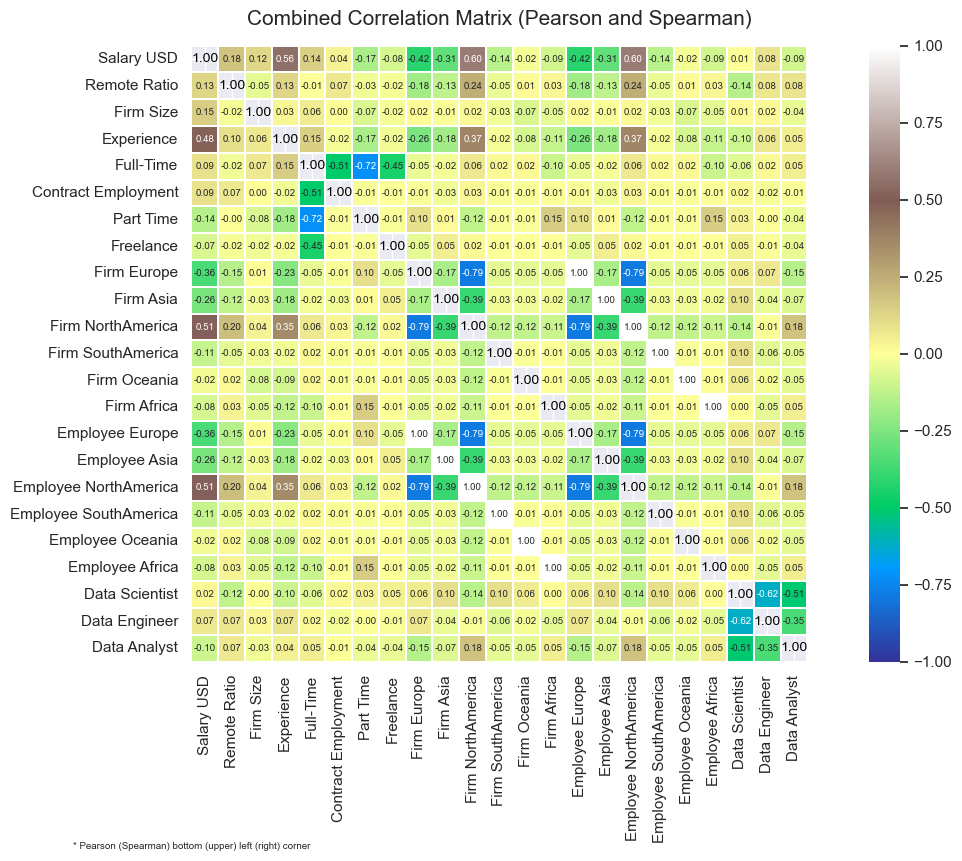

In [17]:
data_temp = raw_data.rename(columns=columns_dic)
lst_vars = [val for val in columns_dic.values()]
combined_heatmap_corr(
    data=data_temp,
    list_columns = lst_vars,
    title='Combined Correlation Matrix (Pearson and Spearman)'
)

<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The table above presents the correlation matrix, showing Pearson correlations (bottom left) and Spearman correlations (upper right). Our main variable of interest is <code>salary</code>. </li>
        <li> The Pearson correlation indicates an average positive correlation between employees' experiences (0.49), a dummy variable for a firm's location in North America (0.51), a dummy variable for an employee's residence in North America (0.51), and salary. However, these correlations slightly increase when using the Spearman correlation. It is important to check for the normality and linearity of the relationships before determining which type of correlation to use. </li>
        <li> Interestingly, there is a very weak correlation between the degree of remote work ("Remote Ratio"), firm size ("Firm Size"), and salary. Additionally, there is either weak or very weak negative correlation between employees' residences or company locations and salary across all continents except North America.</li>
        <li> Aditionally, there is a very weak correlation between the types of the data science titles (Analyst, Engineer or Scientist) and salary. </li>
    </ul>
</div>


---

<a id="chapter5"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 📈 Graphical + Statistical Analyses </b></div>

<a id="chapter5a"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> Data Scientists' Salary </b></div>

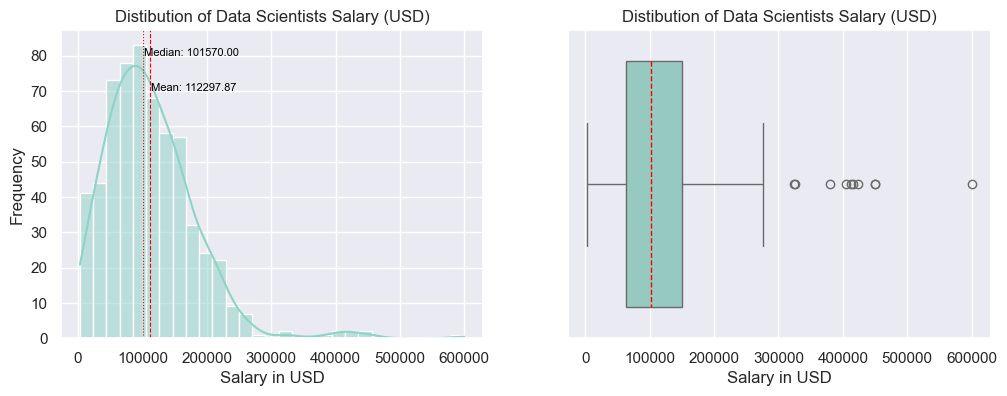

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.histplot(raw_data['salary_in_usd'], kde=True, ax = axes[0])
axes[0].set(xlabel='Salary in USD', ylabel = 'Frequency')
axes[0].set_title('Distibution of Data Scientists Salary (USD)')
axes[0].axvline(raw_data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
mean_value = raw_data['salary_in_usd'].mean() # Estimate mean value of salary
axes[0].annotate(f'Mean: {mean_value:.2f}',
                 xy=(raw_data['salary_in_usd'].mean(), 0),
                 xytext=(mean_value + 500, 70),
                 fontsize=8, color='black')
axes[0].axvline(raw_data['salary_in_usd'].median(), color='red', linestyle=':', linewidth=0.8)
median_value = raw_data['salary_in_usd'].median() # Calculate the median
axes[0].annotate(f'Median: {median_value:.2f}',
                 xy=(raw_data['salary_in_usd'].median(), 0),
                 xytext=(median_value + 500, 80),
                 fontsize=8, color='black')

sns.boxplot(raw_data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Salary in USD')
axes[1].set_title('Distibution of Data Scientists Salary (USD)')
plt.show()

- Let's see some descriptive statistics:

In [19]:
data_salary = raw_data['salary_in_usd'].describe().round(2).to_frame()
data_salary.columns = ['salary_in_usd']
display(data_salary)

,salary_in_usd
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> Data Science salaries are right-skewed, with a median value of 101,570.0 and a mean value of 112,297.87 (The data is not normally distributed).</li>
        <li>The boxplot indicates the presence of some outliers.</li>
        <li> The minimum (maximum) salary is 2,859 (600,000). The minimum salary likely corresponds to a freelance project or part-time job. </li>
        <li> Notably, the standard deviation is very high - 70,957.26 - indicating significant variation in salaries among data scientists. </li>
    </ul>
</div>


---

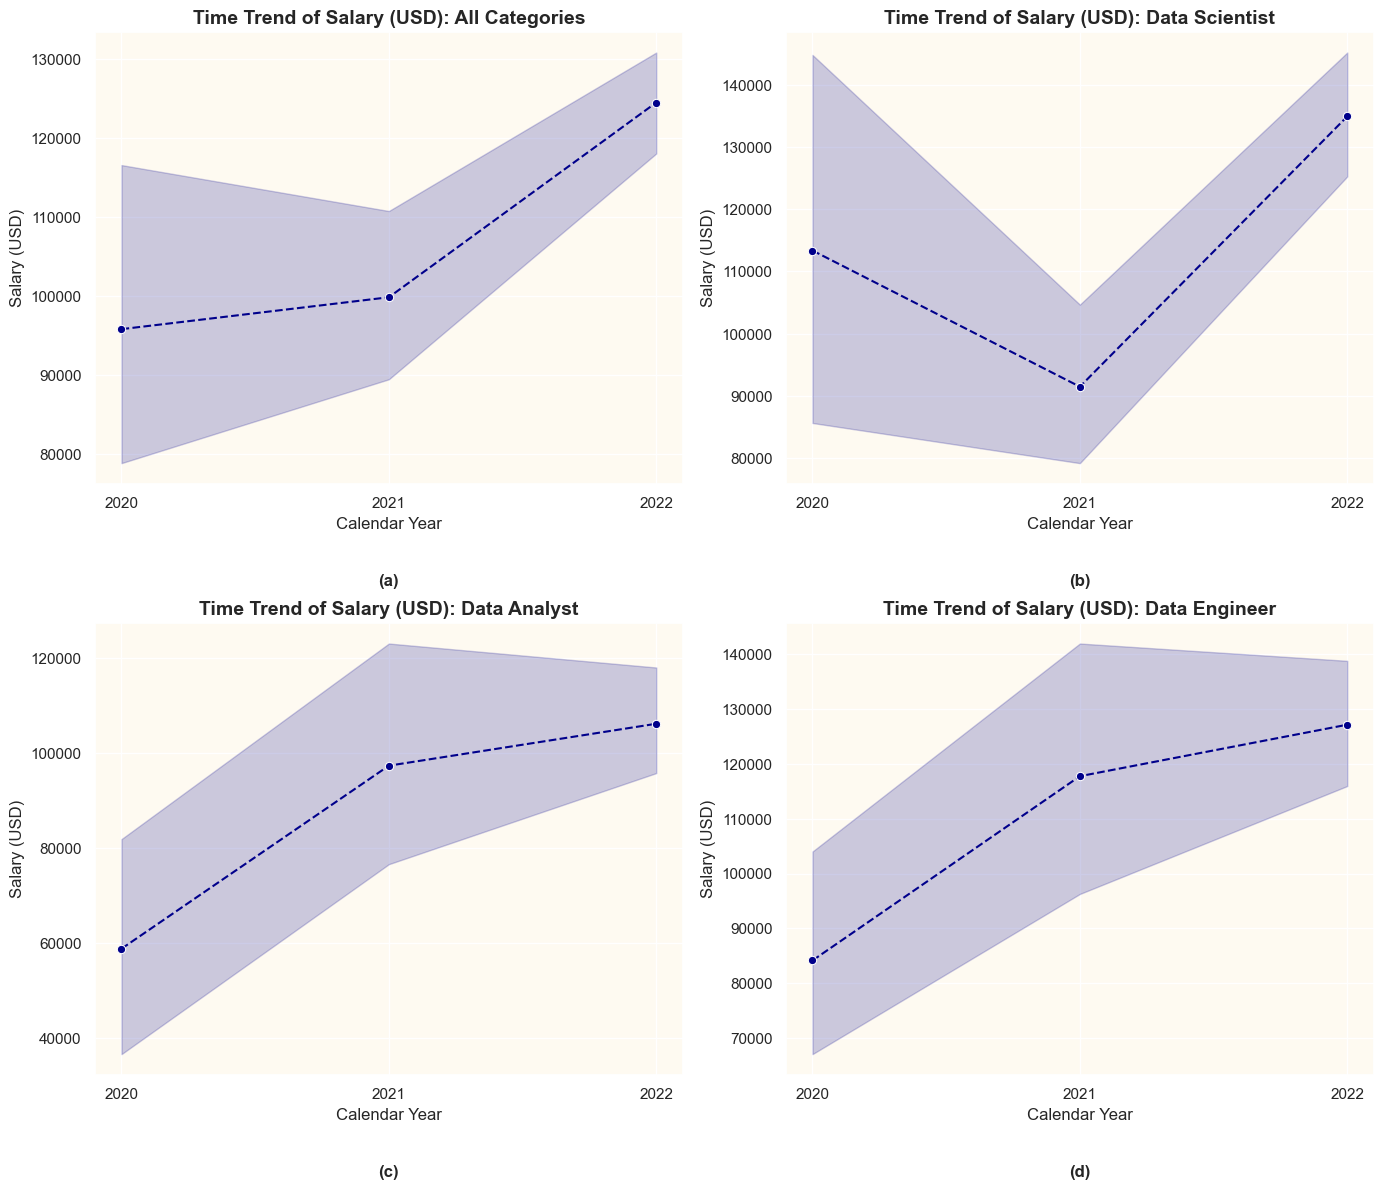

In [20]:
# Define the job categories
categories = ['All', 'Data Scientist', 'Data Analyst', 'Data Engineer']

# Create a 3x2 grid (6 total subplots, one will remain empty)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Panel labels
panel_labels = ['(a)', '(b)', '(c)', '(d)']

# Loop through the categories and plot in the appropriate subplot
for idx, category in enumerate(categories):
    if category == 'All':
        category_data = raw_data  # Use all data for the first graph
    else:
        category_data = raw_data[raw_data['job_category'] == category]  # Filter by category

    # Extract salary and year data
    salary_time = category_data[['salary_in_usd', 'work_year']].sort_values(by='work_year')

    # Plot on the specific axis
    sns.lineplot(
        data=salary_time,
        x='work_year',
        y='salary_in_usd',
        marker='o',
        linestyle='--',
        color='Darkblue',
        markersize=6,
        errorbar=('ci', 95),
        ax=axes[idx]  # Use the correct subplot
    )

    # Set titles and labels
    title = f'Time Trend of Salary (USD): {category}' if category != 'All' else 'Time Trend of Salary (USD): All Categories'
    axes[idx].set_title(title, fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Calendar Year')
    axes[idx].set_ylabel('Salary (USD)')
    axes[idx].set_xticks([2020, 2021, 2022])
    axes[idx].set_xticklabels(['2020', '2021', '2022'])
    axes[idx].set_facecolor("#fefaf1")
    axes[idx].grid(True, linestyle='-', color='white')

    # Add panel labels below the subplot and center them
    axes[idx].annotate(
        panel_labels[idx],  # Label text
        xy=(0.5, -0.2),  # Coordinates relative to the axis (centered below)
        xycoords='axes fraction',
        fontsize=12,
        fontweight='bold',
        ha='center',
        va='top'
    )

# Adjust layout for spacing
sns.set_theme(style="whitegrid")
plt.tight_layout()
plt.show()

In [41]:
ds_type_salary = raw_data.groupby(['work_year', 'job_category'])['salary_in_usd'].mean().round(2).to_frame()
ds_type_salary = ds_type_salary.rename_axis(['Year', 'Job Category'], axis='index')
ds_type_salary.columns = ['Salary USD']
display(ds_type_salary)

Salary USD
Year Job Category              
2020 Data Analyst      58838.69
     Data Engineer     84155.53
     Data Scientist   113366.95
2021 Data Analyst      97377.25
     Data Engineer    117766.38
     Data Scientist    91491.19
2022 Data Analyst     106201.13
     Data Engineer    127157.15
     Data Scientist   134914.61

<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> There is an increasing trend in overall data scientists' salaries over time (Panel A). Notably, the average salary increased significantly between 2021 and 2022.</li>
        <li> The average salaries of Data Scientists, Data Engineers and Data Analysts increased significantly between 2021 and 2022. However, for Data Scientists, the average salary first decreased from 2020 to 2021 and then increased between 2021 and 2022.</li>
        <li> Interestingly, the highest average salary in 2022 relates to Data Scientists, while the lowest relates to Data Analysts. </li>
        <li> The highest average salary for Data Engineers is documented in 2021. </li>
    </ul>
</div>

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in salary of Data Scientists across the years: 2020 ($μ_1$), 2021 ($μ_2$) and 2022 ($μ_3$):*


$$ H_0 : μ_1 = μ_2 = μ_3$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

**Points to consider:**

- There are ``three`` groups that are ``dependent`` and the data is ``continuous``. So, we can use either ``one-way repeated measures ANOVA`` or ``Friedman Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way repeated measures ANOVA``, otherwise we should use a non-parametric statistical test - ``Friedman Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [74]:
salary_2020 = raw_data.loc[raw_data['work_year'] == 2020, 'salary_in_usd']
salary_2021 = raw_data.loc[raw_data['work_year'] == 2021, 'salary_in_usd']
salary_2022 = raw_data.loc[raw_data['work_year'] == 2022, 'salary_in_usd']

#! scipy.stats.friedmanchisquare function requires all input arrays (i.e., salary_2020, salary_2021, and salary_2022) to have the same length.
# Let's check the size of each array and randomly pick up the 

max_length = min(len(salary_2020), len(salary_2021), len(salary_2022))
# min length is 72
max_length = 72

salary_2020_r = np.random.choice(salary_2020, max_length, replace=True)
salary_2021_r = np.random.choice(salary_2021, max_length, replace=True)
salary_2022_r = np.random.choice(salary_2022, max_length, replace=True)


# Tests of normality
print('Normality - 2020:')
_, pval = stats.shapiro(salary_2020_r)
print(normality_test(pval))

print('Normality - 2021:')
_, pval = stats.shapiro(salary_2021_r)
print(normality_test(pval))

print('Normality - 2022:')
_, pval = stats.shapiro(salary_2022_r)
print(normality_test(pval))

Normality - 2020:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - 2021:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - 2022:
The p-value (0.01) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  In all cases the data is <strong>not</strong> normally distributed so we should use a non-parametric statistical test - Friedman Test </li>
    </ul>
</div>

In [75]:
_, pval = stats.friedmanchisquare(salary_2020_r, salary_2021_r, salary_2022_r)
print(hypothesis_test(pval))

The p-value (0.02) is less than the specified significance level 0.05. We reject H0.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  There is sufficient evidence to reject <span>H<sub>0</sub></span>, suggesting a difference in salaries of Data Scientists across the years. </li>
    </ul>
</div>

---

<a id="chapter5b"></a>
### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> Potential Determinants of Data Scientists' Salaries </b></div>

<a id="chapter6"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🔍 Individual Salaries conditional on job category </b></div>

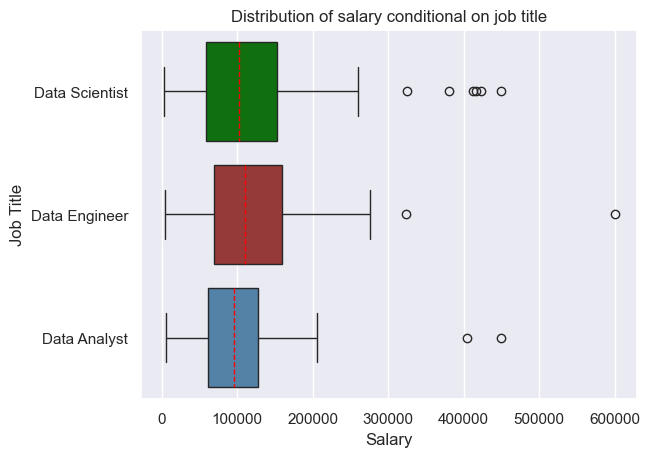

In [105]:
ax = sns.boxplot(raw_data, x = 'salary_in_usd', y='job_category', orient='h', 
                 hue = 'job_category', palette={'Data Analyst': 'steelblue', 'Data Engineer': 'brown', 'Data Scientist': 'green'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_title('Distribution of salary conditional on job title')
ax.set(xlabel = 'Salary', ylabel = 'Job Title')
plt.show();

<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> <strong>Graphical Analysis:</strong> Based on the visual representation, we cannot definitively conclude whether there is a significant difference in salary between Data Analysts and Data Engineers. </li>
        <li> The median salary for Data Engineers is the highest. </li>
        <li> All three job categories have potential outliers. </li>
        <li> Let's examine some further descriptive statistics: </li>
    </ul>
</div>

In [44]:
data_group_salary = raw_data.groupby('job_category')['salary_in_usd'].describe().round(2)
display(data_group_salary)

,count,mean,std,min,25%,50%,75%,max
job_category,,,,,,,,
Data Analyst,136.0,99338.10,59664.56,6072.0,61747.0,95850.0,127093.75,450000.0
Data Engineer,184.0,119603.52,72503.48,4000.0,69342.5,110000.0,160000.00,600000.0
Data Scientist,287.0,113755.32,74216.89,2859.0,59127.5,102100.0,152250.00,450000.0


<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in salary between Data Scientists ($μ_1$), Data Engineers ($μ_2$) and Data Analysts ($μ_3$):*


$$ H_0 : μ_1 = μ_2 = μ_3$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

**Points to consider:**

- There are ``three`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [45]:
scient_salary = raw_data.loc[raw_data['job_category']=='Data Scientist', 'salary_in_usd']
analyst_salary = raw_data.loc[raw_data['job_category'] == 'Data Analyst', 'salary_in_usd']
engineer_salary = raw_data.loc[raw_data['job_category'] == 'Data Engineer', 'salary_in_usd']

# Tests of normality
print('Normality - Data Scientists:')
_, pval = stats.shapiro(scient_salary)
print(normality_test(pval))

print('Normality - Data Analysts:')
_, pval = stats.shapiro(analyst_salary)
print(normality_test(pval))

print('Normality - Data Engineers:')
_, pval = stats.shapiro(engineer_salary)
print(normality_test(pval))

Normality - Data Scientists:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Data Analysts:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Data Engineers:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  In all cases the data is <strong>not</strong> normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test </li>
    </ul>
</div>

In [46]:
_, pval = stats.kruskal(scient_salary, analyst_salary, engineer_salary)
print(hypothesis_test(pval))

The p-value (0.03) is less than the specified significance level 0.05. We reject H0.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  There is sufficient evidence to reject <span>H<sub>0</sub></span>, suggesting a difference in salaries between Data Scientists, Data Engineers and Data Analysts. </li>
    </ul>
</div>

---

<a id="chapter6"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🔍 Salary difference between Data Scientists and Data Engineers in 2022 </b></div>

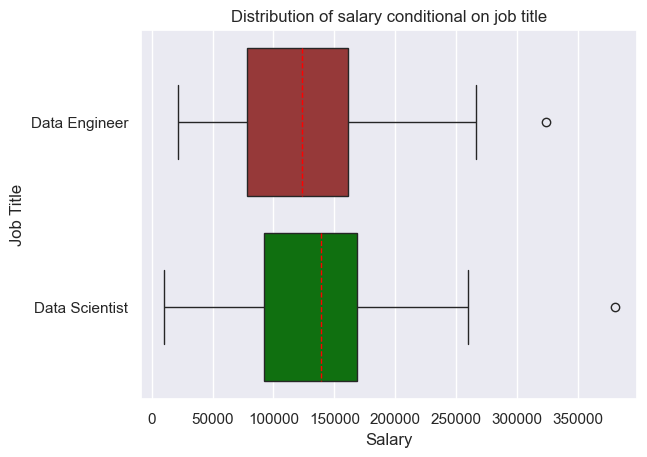

In [ ]:
filtered_data = raw_data[(raw_data['job_category'].isin(['Data Scientist', 'Data Engineer'])) & (raw_data['work_year'] == 2022)]

ax = sns.boxplot(filtered_data, x = 'salary_in_usd', y='job_category', orient='h', 
                 hue = 'job_category', palette={'Data Engineer': 'brown', 'Data Scientist': 'green'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_title('Distribution of salary conditional on job title')
ax.set(xlabel = 'Salary', ylabel = 'Job Title')
plt.show();

<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  Graphical representation clearly indicates that Data Scientists have higher median salary compared to Data Engineers. </li>
        <li>  In both cases, we can observe that there are some outliers in the data.  </li>
        <li> Let's examine whether these differences are statistically significant: </li>
    </ul>
</div>

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in salary between Data Scientists ($μ_1$) and Data Engineers ($μ_2$):*

$$ H_0 : μ_1 <= μ_2$$
$$ H_1 : μ_1 > μ_2$$

**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``two-sample independent t-test`` or ``Mann-Whitney U Test``. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``two-sample independent t-test``, otherwise we should use a non-parametric statistical test - ``Mann-Whitney U Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [51]:
# Test whether the data is normally distributed. 
scientist_data = raw_data.loc[raw_data['job_title'] == 'Data Scientist', 'salary_in_usd']
engineer_data = raw_data.loc[raw_data['job_title'] == 'Data Engineer', 'salary_in_usd']

print('Normality test for Data Scientists:')
_, pval_norm = stats.shapiro(scientist_data)
print(normality_test(pval_norm))

print('Normality test for Data Engineers:')
_, pval_norm = stats.shapiro(engineer_data)
print(normality_test(pval_norm))

Normality test for Data Scientists:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality test for Data Engineers:
The p-value (0.01) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  In all cases the data is <strong>not</strong> normally distributed so we should use a non-parametric statistical test - Mann-Whitney U Test </li>
    </ul>
</div>

In [52]:
_, pval = stats.mannwhitneyu(scientist_data, engineer_data, alternative='greater')
print(hypothesis_test(pval))

The p-value (0.77) is greater than the specified significance level 0.05. We fail to reject H0.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  The evidence is NOT sufficient to reject <span>H<sub>0</sub></span>, suggesting that there is NO difference in salaries between Data Scientists and Data Engineers in 2022. </li>
    </ul>
</div>

---

<a id="chapter6"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🔍 Salary difference in firms with different size </b></div>

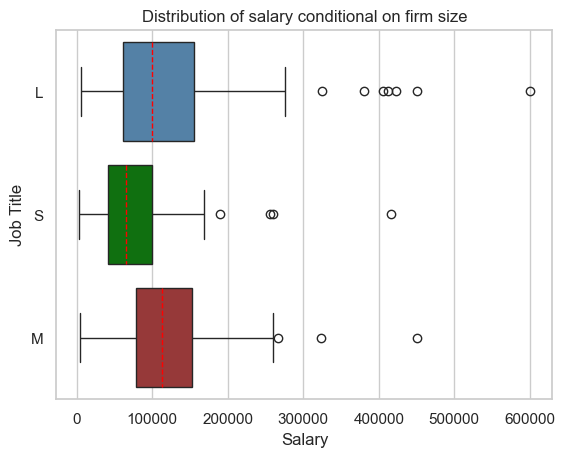

In [55]:
ax = sns.boxplot(raw_data, x = 'salary_in_usd', y='company_size', orient='h', 
                 hue = 'company_size', palette={'L': 'steelblue', 'M': 'brown', 'S': 'green'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )

ax.set_title('Distribution of salary conditional on firm size')
ax.set(xlabel = 'Salary', ylabel = 'Job Title')
plt.show();

<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  Graphical representation clearly indicates that Data Scientists (all types of job titles) have higher median salary in median-sized firms. </li>
        <li>  The lowest median salary of Data Scientists is observed in small-sized firms. </li>
        <li> Let's examine some descriptive evidence: </li>
    </ul>
</div>

In [65]:
group_firm_size = raw_data.groupby('company_size')['salary_in_usd'].mean().round(2).to_frame()
group_firm_size = group_firm_size.rename_axis('Firm Size', axis='index')
group_firm_size.columns = ['Salary (USD)']
display(group_firm_size)

,Salary (USD)
Firm Size,
L,119242.99
M,116905.47
S,77632.67


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  Large-sized firms have the highest mean salary, followed by medium-sized and small-sized firms. </li>
        <li>  The difference in results between the median (see graph above) and mean salary can potentially be explained by the presence of more outliers in large-sized firms compared to medium-sized firms. </li>
        <li> Let's examine some statistical tests: </li>
    </ul>
</div>

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in salaries across different sized firms: small ($μ_1$), median ($μ_2$) and large ($μ_3$):*

$$ H_0 : μ_1 = μ_2 = μ_3$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

**Points to consider:**

- There are ``three`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [66]:
S_salary = raw_data.loc[raw_data['company_size']=='S', 'salary_in_usd']
M_salary = raw_data.loc[raw_data['company_size'] == 'M', 'salary_in_usd']
L_salary = raw_data.loc[raw_data['company_size'] == 'L', 'salary_in_usd']

# Tests of normality
print('Normality - small firms:')
_, pval = stats.shapiro(S_salary)
print(normality_test(pval))

print('Normality - median firms:')
_, pval = stats.shapiro(M_salary)
print(normality_test(pval))

print('Normality - large firms:')
_, pval = stats.shapiro(L_salary)
print(normality_test(pval))

Normality - small firms:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - median firms:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - large firms:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  In all cases the data is <strong>not</strong> normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test </li>
    </ul>
</div>

In [67]:
_, pval = stats.kruskal(S_salary, M_salary, L_salary)
print(hypothesis_test(pval))

The p-value (0.00) is less than the specified significance level 0.05. We reject H0.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  The evidence is sufficient to reject <span>H<sub>0</sub></span>, suggesting that Data Scientists' salaries vary across firms of different sizes. </li>
    </ul>
</div>

---

<a id="chapter6"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🔍 Salary difference in large- vs median-sized firms </b></div>

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in salary of Data Scientists between  large- ($μ_1$) and median-sized firms ($μ_2$):*

$$ H_0 : μ_1 <= μ_2$$
$$ H_1 : μ_1 > μ_2$$

**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``two-sample independent t-test`` or ``Mann-Whitney U Test``. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``two-sample independent t-test``, otherwise we should use a non-parametric statistical test - ``Mann-Whitney U Test``. From previous test, we know that the data is NOT normally distributed. So, we should use ``Mann-Whitney U Test.``

In [68]:
_, pval = stats.mannwhitneyu(L_salary, M_salary, alternative='greater')
print(hypothesis_test(pval))

The p-value (0.89) is greater than the specified significance level 0.05. We fail to reject H0.


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  The evidence is NOT sufficient to reject <span>H<sub>0</sub></span>, suggesting that there is NO difference in salaries of Data Scientists between median- and large-sized firms. </li>
    </ul>
</div>

---

<a id="chapter6"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🔍 The presence of a Data Scientists or a Data Engineer and size of a company </b></div>

In [88]:
filtered_data = raw_data[raw_data['job_category'].isin(['Data Scientist', 'Data Engineer'])].copy()
group_filter = filtered_data.groupby('job_category').count()

table = pd.crosstab(filtered_data['company_size'], filtered_data['job_category'])
table = table.rename_axis('Firm Size', axis='index')
table = table.rename_axis('Job Title', axis='columns')
display(table)

Job Title,Data Engineer,Data Scientist
Firm Size,,
L,59,106
M,106,129
S,19,52


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  Small-sized firms have fewer Data Engineers and Data Scientists. </li>
        <li>  Interestingly, medium-sized firms have more Data Engineers and Data Scientists. However, large-sized firms exhibit a higher ratio of Data Scientists to Data Engineers compared to both small- and medium-sized firms </li>
    </ul>
</div>

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

There is statistically significant difference in presence of Data Engineers and Data Scientists across firms with different sizes
**Points to consider:**

- There are ``three`` groups that are ``independent`` and the data is ``categorical``. So, we can use ``Chi-Square Test``. Important, given that our categorical variable (``company_size``) is ordinal, we can use non-parametric tests for continuous variables. In our case, we should use ``Kruskal-Wallis H Test.``

In [85]:
_, p, _, _ = stats.chi2_contingency(table)
print(hypothesis_test(p))

The p-value (0.01) is less than the specified significance level 0.05. We reject H0.


In [108]:
filtered_data['DS_title'] = filtered_data['job_category'].map({"Data Scientist": 1, "Data Engineer": 0})

size_L = filtered_data.loc[filtered_data['company_size_enc'] == 3, 'DS_title']
size_M = filtered_data.loc[filtered_data['company_size_enc'] == 2, 'DS_title']
size_S = filtered_data.loc[filtered_data['company_size_enc'] == 1, 'DS_title']

_, pval = stats.kruskal(size_L, size_M, size_S)
print(hypothesis_test(pval))


The p-value (0.01) is less than the specified significance level 0.05. We reject H0.


C:\Users\A2010015\AppData\Local\Temp\ipykernel_18764\2915925973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DS_title'] = filtered_data['job_category'].map({"Data Scientist": 1, "Data Engineer": 0})


<div style="padding: 20px; border-color: #c77220; border-radius: 1px; box-shadow: 0 2px 4px 0 rgba(177, 171, 171, 0.1); border: 2px solid #c77220; width: 1510px;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  The evidence is sufficient to reject <span>H<sub>0</sub></span>, suggesting that there is a difference in presence of Data Scientists and Data Engineers across firms with different sizes. </li>
    </ul>
</div>

---

<a id="chapter6"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🔍 Firm Location (Continent) and Data Scientists' Salary </b></div>

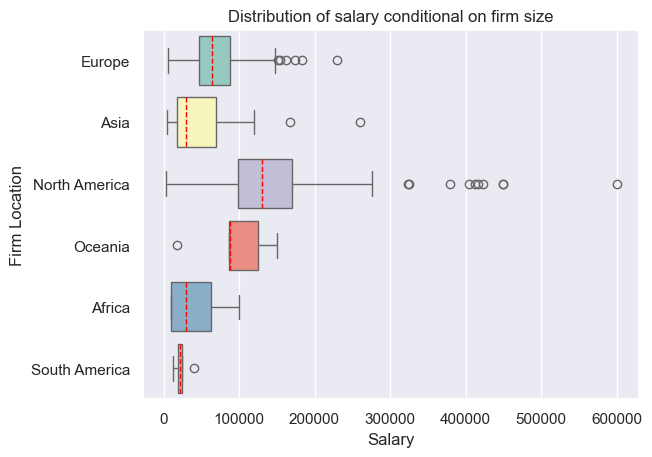

In [111]:
ax = sns.boxplot(raw_data, x = 'salary_in_usd', y='continent_comp', orient='h', 
                 hue = 'continent_comp', 
                 medianprops={"color": "red", "linestyle": '--'}
                 )

ax.set_title('Distribution of salary conditional on firm size')
ax.set(xlabel = 'Salary', ylabel = 'Firm Location')
plt.show();

In [123]:
grouped_continent = raw_data.groupby('continent_comp')['salary_in_usd'].agg(['count', 'mean']).round(2)
grouped_continent

,count,mean
continent_comp,,
Africa,4,42318.00
Asia,47,48312.77
Europe,157,69358.37
North America,389,139461.95
Oceania,5,93436.20
South America,5,23538.00


<h4 style="margin-bottom: 0;"> 🔍 Insurance bills conditional on age group </h4>

In [64]:
# Generate new variable that splits the age into subgroups
"""
    18–27: Young Adults (below 25th percentile)
    28–39: Early Middle Age (25th to 50th percentile)
    40–51: Late Middle Age (50th to 75th percentile)
    52–64: Seniors (above 75th percentile)
"""
# right = False - ensures that the intervals are as follows [a, b)    
data['AgeBins'] = pd.cut(data['age'], 
                         bins=[18, 28, 40, 52, 65], 
                         labels=['YoungAdult', 'EarlyMiddleAge', 'LateMiddleAge', 'Seniors'], 
                         right = False)    

In [ ]:
ax = sns.boxplot(data, x = 'charges', y='AgeBins', orient='h', 
                 hue = 'AgeBins', palette={'YoungAdult': 'goldenrod', 'EarlyMiddleAge': 'steelblue', 'LateMiddleAge': 'forestgreen', 'Seniors': 'firebrick'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1, 2, 3])  
ax.set_yticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
ax.set_title('Distribution of insurance bills conditional on age')
ax.set(xlabel = 'Insurance bill', ylabel = 'Age Category')
plt.show();


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The graphical representation indicates a clear trend of increasing health insurance bills with age
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [ ]:
data_group_age = data.groupby('AgeBins', observed=False)['charges'].describe().round(2)
display(data_group_age)

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- With age, the mean value of health-related insurance bills increases.
</p>
<p>
- The distributions of insurance bills across age groups are right-skewed.
</p>
<p>
- <strong>Important point to consider:</strong> The number of observations within the age group is approximately equal.
</p>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills across different age groups: Young Adult ($μ_1$), Early Middle Age ($μ_2$), Late Middle Age ($μ_3$), Seniors ($μ_4$):*

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [ ]:
young_bill = data.loc[data['AgeBins']=='YoungAdult', 'charges']
earlymiddle_bill = data.loc[data['AgeBins']=='EarlyMiddleAge', 'charges']
latemiddle_bill = data.loc[data['AgeBins']=='LateMiddleAge', 'charges']
senior_bill = data.loc[data['AgeBins']=='Seniors', 'charges']

# Tests of normality
print('Normality - Young Adults:')
_, pval = stats.shapiro(young_bill)
print(normality_test(pval))

print('Normality - Early Middle Age:')
_, pval = stats.shapiro(earlymiddle_bill)
print(normality_test(pval))

print('Normality - Late Middle Age:')
_, pval = stats.shapiro(latemiddle_bill)
print(normality_test(pval))

print('Normality - Seniors:')
_, pval = stats.shapiro(senior_bill)
print(normality_test(pval))

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- In all cases the data is not normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test  </p>

---

In [ ]:
_, pval = stats.kruskal(young_bill, earlymiddle_bill, latemiddle_bill, senior_bill)
print(hypothesis_test(pval))

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in insurance bills across age groups!
</p>

---

<h4 style="margin-bottom: 0; color: red; font-weight: bold;">📌 Extra Analysis</h4>

- In this section, I test additional hypotheses:
    - Do we observe a statistically significant difference in smoking behavior within:  
        a. Gender groups  
        b. Age subgroups

<h4 style="margin-bottom: 0;"> 🔍 Smokers frequency conditional on age group </h4>

In [ ]:
ax = sns.countplot(data=data, x=data['AgeBins'], hue='smoker',
                   palette={'yes': 'goldenrod', 'no': 'steelblue'})
ax.set_xticks([0, 1, 2, 3])  
ax.set_xticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
ax.set(xlabel='Age Group', ylabel='Frequency')
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels
ax.legend(handles=handles, labels=['Yes', 'No'], title='Smoker', 
          loc='upper right', bbox_to_anchor=(1.15, 1.15))
plt.title('The ratio of smokers to non-smokers by age group.')
plt.show()


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- The graphical representation indicates no clear difference in smoking behavior across age groups
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [ ]:
cross_tab = pd.crosstab(index=data['AgeBins'], columns=data['smoker'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="twilight")
ax.set(xlabel='Smokers', ylabel='Age')
ax.set_xticks([0.5, 1.5])  
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticks([0.5, 1.5, 2.5, 3.5])  
ax.set_yticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
plt.title('Contingency Table')
plt.show()

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

There is statistically significant difference in smoking behavior across different age groups
**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``categorical``. So, we should use ``Chi-Square Test``. 

In [ ]:
crosstab_tab = pd.crosstab(data['AgeBins'], data['smoker'])
display(crosstab_tab)

In [ ]:
_, pval, _, _ = stats.chi2_contingency(crosstab_tab)
hypothesis_test(pval)


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in smoking behavior across age groups!
</p>

---

<h4 style="margin-bottom: 0;"> 🔍 Smokers frequency conditional on gender </h4>

In [ ]:
ax = sns.countplot(data=data, x=data['sex'], hue='smoker',
                   palette={'yes': 'goldenrod', 'no': 'steelblue'})
ax.set_xticks([0, 1])  # Fix the tick positions (0 for 'female', 1 for 'male')
ax.set_xticklabels(['Female', 'Male'])
ax.set(xlabel='Gender', ylabel='Frequency')
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels
ax.legend(handles=handles, labels=['Yes', 'No'], title='Smoker', 
          loc='upper right', bbox_to_anchor=(1.15, 1.15))
plt.title('The ratio of smokers to non-smokers by gender.')
plt.show()


<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We can see that there are more males who smoke compared to females. Additionally, it can be inferred that the ratio of smoking males to non-smoking males is higher than the ratio of smoking females to non-smoking females.
</p>
<p>
- Let's examine some further descriptive statistics:
</p>

---

In [ ]:
cross_tab = pd.crosstab(index=data['sex'], columns=data['smoker'])
ax = sns.heatmap(cross_tab, annot=True, linewidths=.5, fmt='.0f', cmap="twilight")
ax.set(xlabel='Smokers', ylabel='Gender')
ax.set_xticks([0.5, 1.5])  
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticks([0.5, 1.5])  
ax.set_yticklabels(['Female', 'Male'])
plt.title('Contingency Table')
plt.show()



<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

There is statistically significant difference in smoking behavior across different gender groups
**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``categorical``. So, we should use ``Chi-Square Test``. 

In [ ]:
crosstab_tab = pd.crosstab(data['sex'], data['smoker'])
display(crosstab_tab)

In [ ]:
_, pval, _, _ = stats.chi2_contingency(crosstab_tab)
hypothesis_test(pval)

<h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
<p>
- We find evidence to reject H0: There are statistically significant differences in smoking behavior across gender groups!
</p>

---
---

## <center><span style="color:red;"> <b> 🚨 Conclusions of EDA </b></span><center>

* There is no evidence to suggest that there is a difference in the amount of insurance bills paid by male vs female clients.
* The amount of insurance bills for non-smoking clients is lower than for smoking clients.
* There is no evidence to suggest that there is a difference in the amount of insurance bills across different regions.
* There is evidence to suggest that there is a difference in the amount of insurance bills across different age groups.

* **Extra Analysis:**
    * There is an association between age group and smoking status.
    * There is an association between gender and smoking status.